In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1 think+code: astronomical images

In [2]:
from astropy.io import fits

stars1 = fits.open('stars1.fits')
stars1.info()

stars2 = fits.open('stars2.fits')
stars2.info()

img1 = fits.open('stars1.fits')[0].data
img2 = fits.open('stars2.fits')[0].data

Filename: stars1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (256, 256)   float64   
Filename: stars2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   (256, 256)   float64   


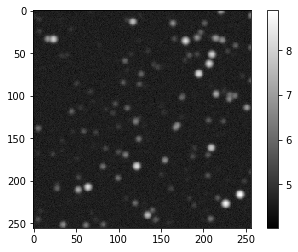

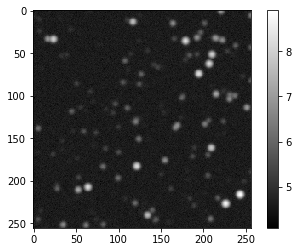

In [3]:
for image in [img1, img2]:
    plt.imshow(np.log(image), cmap='gray')
    plt.colorbar()
    plt.show()

## 2 think+pair+code: find the asteroid

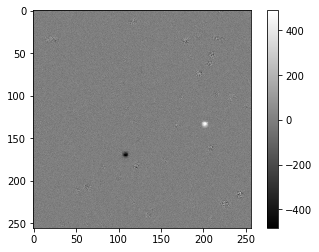

In [4]:
difference = img2 - img1
plt.imshow(difference, cmap='gray')
plt.colorbar()
plt.show()

In [5]:
# find the coordinates

max = np.array(np.where(difference==np.max(difference)))
min = np.array(np.where(difference==np.min(difference)))

print(max, min)

[[133]
 [202]] [[170]
 [108]]


In [6]:
D = 1.5e11          # Distance (in meters)
time = 30 * 60      # Time between exposures (in seconds)

def asteroidvelocity(min, max):
    x = max[1] - min[1]
    y = max[0] - min[0]
    mag = np.float(np.sqrt(x**2 + y**2))
    print("The separation between the start and end points, in pixels: {}.".format(mag))
    separationangle = 0.4 * mag
    print("The separation between the start and end points, in degrees: {}.".format(separationangle))
    separationradians = separationangle / 206265
    print("The separation between the start and end points, in radians: {}.".format(separationradians))
    return (separationradians * D / time) / 1000

In [7]:
print("The asteroid's velocity in km/s: {}.".format(asteroidvelocity(min, max)))

The separation between the start and end points, in pixels: 101.01980003939822.
The separation between the start and end points, in degrees: 40.40792001575929.
The separation between the start and end points, in radians: 0.00019590294046861701.
The asteroid's velocity in km/s: 16.325245039051417.
